In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import squarify
from scipy.stats import norm
from scipy import stats
from collections import Counter
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
# reads in full 1970-2016 Global Terrorism Database (GTD)
df = pd.read_csv("gtd_full.csv")

In [3]:
# retains expected relevant features from observations between 1990-2016
#df = df[((df['iyear']) > 1989) & (df['iyear'] < 2017)]
features = ['eventid', 'gname', 'iyear', 'extended', 'country', 'country_txt', 'city', 'latitude', 'longitude', 'success', 'suicide', 'attacktype1', 'targtype1', 'targsubtype1', 'natlty1', 'individual', 'weaptype1', 'weapsubtype1', 'nkill']
df = df[features]
df.head(3)

,eventid,gname,iyear,extended,country,country_txt,city,latitude,longitude,success,suicide,attacktype1,targtype1,targsubtype1,natlty1,individual,weaptype1,weapsubtype1,nkill
0,197000000001,MANO-D,1970,0,58,Dominican Republic,Santo Domingo,18.456792,-69.951164,1,0,1,14,68.0,58.0,0,13,NaN,1.0
1,197000000002,23rd of September Communist League,1970,0,130,Mexico,Mexico city,19.432608,-99.133207,1,0,6,7,45.0,21.0,0,13,NaN,0.0
2,197001000001,Unknown,1970,0,160,Philippines,Unknown,15.478598,120.599741,1,0,1,10,54.0,217.0,0,13,NaN,1.0


In [4]:
# fills missing values: categorical variables default 0 (or unknown), continuous variables with mean
df['extended'].fillna(0, inplace=True)
df['success'].fillna(0, inplace=True)
df['suicide'].fillna(0, inplace=True)
df['attacktype1'].fillna(9, inplace=True)
df['targtype1'].fillna(20, inplace=True)
df['targsubtype1'].fillna(112, inplace=True)
df['natlty1'].fillna(1005, inplace=True)
df['weaptype1'].fillna(13, inplace=True)
df['weapsubtype1'].fillna(27, inplace=True)
df['nkill'].fillna((df['nkill'].mean()), inplace=True)

df.shape

(170350, 19)

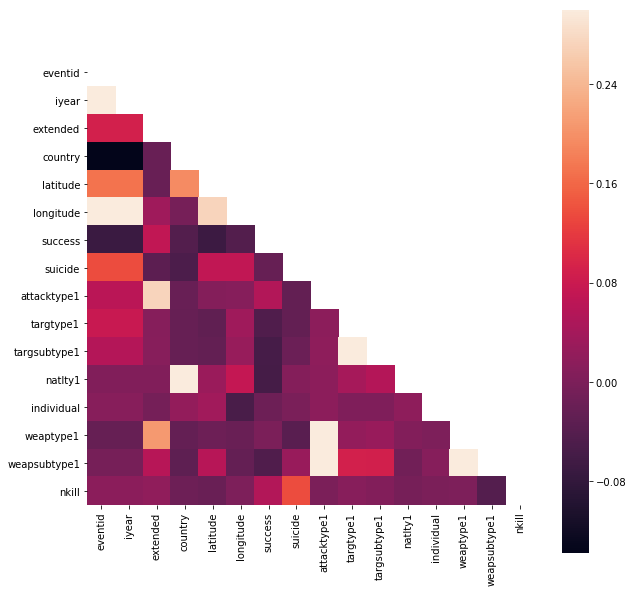

In [5]:
corr_matrix = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(corr_matrix, mask=mask, vmax=.3, square=True)

In [6]:
df_unknowns = df
df = df[df['gname'] != 'Unknown']
df_unknowns.shape
df.shape

(92044, 19)

In [7]:
# examines our target variable
target = df_unknowns['gname']

count = Counter(target)
print('Number of terrorist groups: {}'.format(len(count)))

high = count.most_common(1)[0]
print('Most common group observed: {} = {:.2f}%'.format(high[0], 100 * high[1] / target.size))
count.most_common(10)

Number of terrorist groups: 3454
Most common group observed: Unknown = 45.97%


[('Unknown', 78306),
 ('Taliban', 6575),
 ('Shining Path (SL)', 4551),
 ('Islamic State of Iraq and the Levant (ISIL)', 4287),
 ('Farabundo Marti National Liberation Front (FMLN)', 3351),
 ('Al-Shabaab', 2683),
 ('Irish Republican Army (IRA)', 2669),
 ('Revolutionary Armed Forces of Colombia (FARC)', 2481),
 ("New People's Army (NPA)", 2414),
 ("Kurdistan Workers' Party (PKK)", 2152)]

In [8]:
# examines our target variable
target = df['gname']

count = Counter(target)
print('Number of terrorist groups: {}'.format(len(count)))

high = count.most_common(1)[0]
print('Most common group observed: {} = {:.2f}%'.format(high[0], 100 * high[1] / target.size))
count.most_common(10)

Number of terrorist groups: 3453
Most common group observed: Taliban = 7.14%


[('Taliban', 6575),
 ('Shining Path (SL)', 4551),
 ('Islamic State of Iraq and the Levant (ISIL)', 4287),
 ('Farabundo Marti National Liberation Front (FMLN)', 3351),
 ('Al-Shabaab', 2683),
 ('Irish Republican Army (IRA)', 2669),
 ('Revolutionary Armed Forces of Colombia (FARC)', 2481),
 ("New People's Army (NPA)", 2414),
 ("Kurdistan Workers' Party (PKK)", 2152),
 ('Boko Haram', 2077)]

In [9]:
#df.apply(preprocessing.LabelEncoder().fit_transform);
df_unknowns = df_unknowns.dropna(axis=0, how='any')
df_unknowns.to_csv("gtd_unknowns_processed.csv", encoding='utf-8', index=False)

In [10]:
#df.apply(preprocessing.LabelEncoder().fit_transform);
df = df.dropna(axis=0, how='any')
df.to_csv("gtd_processed.csv", encoding='utf-8', index=False)